In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_data = pd.read_csv("train.csv")

In [3]:
test_data = pd.read_csv("test.csv")

In [4]:
train_data

,CustomerID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Avg Monthly GB Download,Contract,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,CustomerStatus
0,1,Male,39,No,0,Monterey,93940,36.362741,-121.869685,0,...,6.0,Month-to-Month,Bank Withdrawal,99.65,2404.85,0.00,0,616.32,3021.17,Stayed
1,2,Female,45,No,0,West Sacramento,95605,38.592745,-121.540036,0,...,5.0,One Year,Credit Card,74.75,2282.95,0.00,0,1070.40,3353.35,Stayed
2,3,Male,63,No,0,Studio City,91604,34.139082,-118.392750,0,...,12.0,Month-to-Month,Mailed Check,31.10,419.70,0.00,0,0.00,419.70,Stayed
3,4,Male,55,No,0,Jamul,91935,32.695681,-116.798386,0,...,4.0,Month-to-Month,Bank Withdrawal,90.40,356.65,0.00,0,127.68,484.33,Stayed
4,5,Male,35,No,0,Alleghany,95910,39.467828,-120.841386,0,...,NaN,Month-to-Month,Credit Card,20.25,36.80,0.00,0,31.66,68.46,Joined
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5494,5495,Male,39,Yes,0,Walnut Creek,94598,37.916648,-122.008483,1,...,26.0,Month-to-Month,Credit Card,-8.00,3204.65,35.82,110,1074.24,4353.07,Churned
5495,5496,Female,21,Yes,0,Long Beach,90802,33.752524,-118.210737,9,...,26.0,One Year,Bank Withdrawal,97.65,6982.50,0.00,80,1166.20,8228.70,Stayed
5496,5497,Male,51,No,1,Los Angeles,90041,34.137412,-118.207607,0,...,28.0,Month-to-Month,Bank Withdrawal,106.35,3549.25,0.00,0,737.46,4286.71,Churned
5497,5498,Male,41,Yes,2,Greenwood,95635,38.921333,-120.897718,3,...,19.0,Two Year,Bank Withdrawal,105.25,7173.15,0.00,0,2135.20,9308.35,Stayed


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5499 entries, 0 to 5498
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   CustomerID                         5499 non-null   int64  
 1   Gender                             5499 non-null   object 
 2   Age                                5499 non-null   int64  
 3   Married                            5499 non-null   object 
 4   Number of Dependents               5499 non-null   int64  
 5   City                               5499 non-null   object 
 6   Zip Code                           5499 non-null   int64  
 7   Latitude                           5499 non-null   float64
 8   Longitude                          5499 non-null   float64
 9   Number of Referrals                5499 non-null   int64  
 10  Tenure in Months                   5499 non-null   int64  
 11  Offer                              5499 non-null   objec

In [6]:
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,5499.0,2750.000000,1587.568896,1.000000,1375.500000,2750.000000,4124.500000,5499.000000
Age,5499.0,46.400618,16.758087,19.000000,32.000000,46.000000,60.000000,80.000000
Number of Dependents,5499.0,0.469358,0.955883,0.000000,0.000000,0.000000,0.000000,8.000000
Zip Code,5499.0,93498.736316,1853.026214,90001.000000,92107.000000,93531.000000,95334.000000,96150.000000
Latitude,5499.0,36.207479,2.461980,32.555828,33.993203,36.276880,38.168198,41.962127
Longitude,5499.0,-119.757631,2.142696,-124.301372,-121.776970,-119.622676,-117.974404,-114.192901
Number of Referrals,5499.0,1.960538,2.991939,0.000000,0.000000,0.000000,3.000000,11.000000
Tenure in Months,5499.0,32.377887,24.523360,1.000000,9.000000,29.000000,55.000000,72.000000
Avg Monthly Long Distance Charges,4965.0,25.426773,14.240775,1.010000,13.060000,25.570000,37.650000,49.990000
Avg Monthly GB Download,4331.0,26.357423,19.737367,2.000000,12.000000,21.000000,30.000000,85.000000


In [7]:
refined_train_data = train_data.drop(["CustomerID", "City", "Latitude", "Longitude"], axis = 1)

In [8]:
refined_test_data = test_data.drop(["CustomerID", "City", "Latitude", "Longitude"], axis = 1)

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [10]:
le = LabelEncoder()
oe = OrdinalEncoder()

In [11]:
refined_train_data[["Married", "Contract", "Payment Method", "Gender", "Offer", "Phone Service", "Internet Service"]] = oe.fit_transform(refined_train_data[["Married", "Contract", "Payment Method", "Gender", "Offer", "Phone Service", "Internet Service"]])

In [12]:
refined_train_data["CustomerStatus"] = le.fit_transform(refined_train_data["CustomerStatus"])

In [13]:
refined_test_data[["Married", "Contract", "Payment Method", "Gender", "Offer", "Phone Service", "Internet Service"]] = oe.fit_transform(refined_test_data[["Married", "Contract", "Payment Method", "Gender", "Offer", "Phone Service", "Internet Service"]])

In [14]:
refined_train_data

,Gender,Age,Married,Number of Dependents,Zip Code,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,...,Avg Monthly GB Download,Contract,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,CustomerStatus
0,1.0,39,0.0,0,93940,0,24,3.0,1.0,25.68,...,6.0,0.0,0.0,99.65,2404.85,0.00,0,616.32,3021.17,2
1,0.0,45,0.0,0,95605,0,32,3.0,1.0,33.45,...,5.0,1.0,1.0,74.75,2282.95,0.00,0,1070.40,3353.35,2
2,1.0,63,0.0,0,91604,0,14,4.0,0.0,NaN,...,12.0,0.0,2.0,31.10,419.70,0.00,0,0.00,419.70,2
3,1.0,55,0.0,0,91935,0,4,0.0,1.0,31.92,...,4.0,0.0,0.0,90.40,356.65,0.00,0,127.68,484.33,2
4,1.0,35,0.0,0,95910,0,2,0.0,1.0,15.83,...,NaN,0.0,1.0,20.25,36.80,0.00,0,31.66,68.46,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5494,1.0,39,1.0,0,94598,1,32,3.0,1.0,33.57,...,26.0,0.0,1.0,-8.00,3204.65,35.82,110,1074.24,4353.07,0
5495,0.0,21,1.0,0,90802,9,70,1.0,1.0,16.66,...,26.0,1.0,0.0,97.65,6982.50,0.00,80,1166.20,8228.70,2
5496,1.0,51,0.0,1,90041,0,34,3.0,1.0,21.69,...,28.0,0.0,0.0,106.35,3549.25,0.00,0,737.46,4286.71,0
5497,1.0,41,1.0,2,95635,3,68,0.0,1.0,31.40,...,19.0,2.0,0.0,105.25,7173.15,0.00,0,2135.20,9308.35,2


In [15]:
refined_test_data

,Gender,Age,Married,Number of Dependents,Zip Code,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Internet Service,Avg Monthly GB Download,Contract,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,0.0,31,0.0,0,92054,0,8,5.0,1.0,31.02,0.0,NaN,1.0,1.0,19.20,161.95,0.0,0,248.16,410.11
1,1.0,48,0.0,1,91980,0,27,3.0,1.0,32.28,0.0,NaN,2.0,1.0,19.70,509.30,0.0,0,871.56,1380.86
2,1.0,69,0.0,0,92122,0,24,3.0,1.0,30.87,1.0,15.0,0.0,0.0,76.10,1712.70,0.0,0,740.88,2453.58
3,1.0,29,0.0,0,91304,0,28,3.0,0.0,NaN,1.0,48.0,0.0,1.0,30.10,810.85,0.0,0,0.00,810.85
4,1.0,56,0.0,0,96126,0,2,5.0,1.0,37.72,1.0,27.0,0.0,1.0,69.80,134.70,0.0,0,75.44,210.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1538,1.0,31,1.0,1,92656,9,53,2.0,1.0,2.11,1.0,19.0,0.0,1.0,65.00,3363.80,0.0,0,111.83,3475.63
1539,0.0,40,1.0,2,92835,9,56,0.0,1.0,29.06,0.0,NaN,2.0,1.0,24.95,1468.90,0.0,0,1627.36,3096.26
1540,0.0,32,0.0,0,95417,0,9,5.0,1.0,45.99,0.0,NaN,0.0,1.0,20.45,147.55,0.0,0,413.91,561.46
1541,1.0,25,1.0,0,93212,6,50,2.0,1.0,14.32,1.0,58.0,1.0,0.0,69.65,3442.15,0.0,0,716.00,4158.15


In [16]:
refined_train_data.isnull().sum()

Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
Zip Code                                0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges     534
Internet Service                        0
Avg Monthly GB Download              1168
Contract                                0
Payment Method                          0
Monthly Charge                          0
Total Charges                           0
Total Refunds                           0
Total Extra Data Charges                0
Total Long Distance Charges             0
Total Revenue                           0
CustomerStatus                          0
dtype: int64

In [17]:
refined_test_data.isnull().sum()

Gender                                 0
Age                                    0
Married                                0
Number of Dependents                   0
Zip Code                               0
Number of Referrals                    0
Tenure in Months                       0
Offer                                  0
Phone Service                          0
Avg Monthly Long Distance Charges    148
Internet Service                       0
Avg Monthly GB Download              357
Contract                               0
Payment Method                         0
Monthly Charge                         0
Total Charges                          0
Total Refunds                          0
Total Extra Data Charges               0
Total Long Distance Charges            0
Total Revenue                          0
dtype: int64

In [18]:
from sklearn.impute import SimpleImputer

In [19]:
si = SimpleImputer(missing_values = np.nan, strategy ='mean')

In [20]:
refined_train_data["Avg Monthly Long Distance Charges"] = si.fit_transform(refined_train_data["Avg Monthly Long Distance Charges"].values.reshape(-1, 1))
refined_train_data["Avg Monthly GB Download"] = si.fit_transform(refined_train_data["Avg Monthly GB Download"].values.reshape(-1, 1)) 

In [21]:
refined_test_data["Avg Monthly Long Distance Charges"] = si.fit_transform(refined_test_data["Avg Monthly Long Distance Charges"].values.reshape(-1, 1))
refined_test_data["Avg Monthly GB Download"] = si.fit_transform(refined_test_data["Avg Monthly GB Download"].values.reshape(-1, 1)) 

In [22]:
refined_train_data.isnull().sum()

Gender                               0
Age                                  0
Married                              0
Number of Dependents                 0
Zip Code                             0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Internet Service                     0
Avg Monthly GB Download              0
Contract                             0
Payment Method                       0
Monthly Charge                       0
Total Charges                        0
Total Refunds                        0
Total Extra Data Charges             0
Total Long Distance Charges          0
Total Revenue                        0
CustomerStatus                       0
dtype: int64

In [23]:
refined_test_data.isnull().sum()

Gender                               0
Age                                  0
Married                              0
Number of Dependents                 0
Zip Code                             0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Internet Service                     0
Avg Monthly GB Download              0
Contract                             0
Payment Method                       0
Monthly Charge                       0
Total Charges                        0
Total Refunds                        0
Total Extra Data Charges             0
Total Long Distance Charges          0
Total Revenue                        0
dtype: int64

In [24]:
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [25]:
X = refined_train_data.drop("CustomerStatus", axis = 1)
y = refined_train_data["CustomerStatus"]

In [26]:
std_slc = StandardScaler()
pca = decomposition.PCA()
dec_tree = tree.DecisionTreeClassifier()

In [27]:
pipe = Pipeline(steps=[('std_slc', std_slc),
                        ('pca', pca),
                        ('dec_tree', dec_tree)])

In [28]:
n_components = list(range(1,X.shape[1]+1,1))

In [29]:
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]

In [30]:
parameters = dict(pca__n_components=n_components,
                    dec_tree__criterion=criterion,
                    dec_tree__max_depth=max_depth)

In [31]:
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X, y)

GridSearchCV(estimator=Pipeline(steps=[('std_slc', StandardScaler()),
                                       ('pca', PCA()),
                                       ('dec_tree', DecisionTreeClassifier())]),
             param_grid={'dec_tree__criterion': ['gini', 'entropy'],
                         'dec_tree__max_depth': [2, 4, 6, 8, 10, 12],
                         'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11, 12, 13, 14, 15, 16, 17, 18,
                                               19, 20]})

In [32]:
print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_GS.best_estimator_.get_params()['dec_tree'])

Best Criterion: entropy
Best max_depth: 6
Best Number Of Components: 18

DecisionTreeClassifier(criterion='entropy', max_depth=6)


In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
sc = StandardScaler()

In [35]:
X = sc.fit_transform(X)

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [40]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [41]:
predictions = dtree.predict(X_test)

In [42]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [43]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.68      0.55      0.61       473
           1       0.68      0.49      0.57       110
           2       0.86      0.95      0.90      1232

    accuracy                           0.82      1815
   macro avg       0.74      0.66      0.69      1815
weighted avg       0.80      0.82      0.81      1815



In [44]:
print(confusion_matrix(y_test, predictions))

[[ 262   25  186]
 [  56   54    0]
 [  67    0 1165]]


In [45]:
print(accuracy_score(y_test, predictions))

0.8159779614325069


In [46]:
testData = sc.fit_transform(refined_test_data)

In [47]:
predictions = dtree.predict(testData)
predictions

array([2, 2, 0, ..., 2, 2, 2])

In [48]:
predictions_test = le.inverse_transform(predictions)

In [49]:
predictions_test

array(['Stayed', 'Stayed', 'Churned', ..., 'Stayed', 'Stayed', 'Stayed'],
      dtype=object)

In [50]:
df = pd.DataFrame({"CustomerStatus":predictions_test})
ID = test_data["CustomerID"]

In [51]:
result = pd.concat([ID,df], axis=1, join='inner')
display(result)

,CustomerID,CustomerStatus
0,1,Stayed
1,2,Stayed
2,3,Churned
3,4,Stayed
4,5,Churned
...,...,...
1538,1539,Stayed
1539,1540,Stayed
1540,1541,Stayed
1541,1542,Stayed


In [52]:
result.to_csv('results.csv', index=False)

In [53]:
from sklearn import tree

In [54]:
text_representation = tree.export_text(dtree)
print(text_representation)

|--- feature_6 <= -1.18
|   |--- feature_10 <= -0.70
|   |   |--- feature_5 <= 0.35
|   |   |   |--- feature_13 <= 1.67
|   |   |   |   |--- feature_14 <= -1.44
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_14 >  -1.44
|   |   |   |   |   |--- feature_9 <= 1.61
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_9 >  1.61
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- feature_13 >  1.67
|   |   |   |   |--- feature_15 <= -1.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_15 >  -1.00
|   |   |   |   |   |--- feature_14 <= -1.42
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_14 >  -1.42
|   |   |   |   |   |   |--- class: 1
|   |   |--- feature_5 >  0.35
|   |   |   |--- class: 1
|   |--- feature_10 >  -0.70
|   |   |--- feature_12 <= -0.30
|   |   |   |--- feature_1 <= 1.08
|   |   |   |   |--- feature_3 <= 0.03
|   |   |   |   |   |--- feature_13 <= -0.00
|   |   |   |   |   |   |--- class: 0
|   |   

In [55]:
features = list(refined_train_data.columns[1:])
features

['Age',
 'Married',
 'Number of Dependents',
 'Zip Code',
 'Number of Referrals',
 'Tenure in Months',
 'Offer',
 'Phone Service',
 'Avg Monthly Long Distance Charges',
 'Internet Service',
 'Avg Monthly GB Download',
 'Contract',
 'Payment Method',
 'Monthly Charge',
 'Total Charges',
 'Total Refunds',
 'Total Extra Data Charges',
 'Total Long Distance Charges',
 'Total Revenue',
 'CustomerStatus']

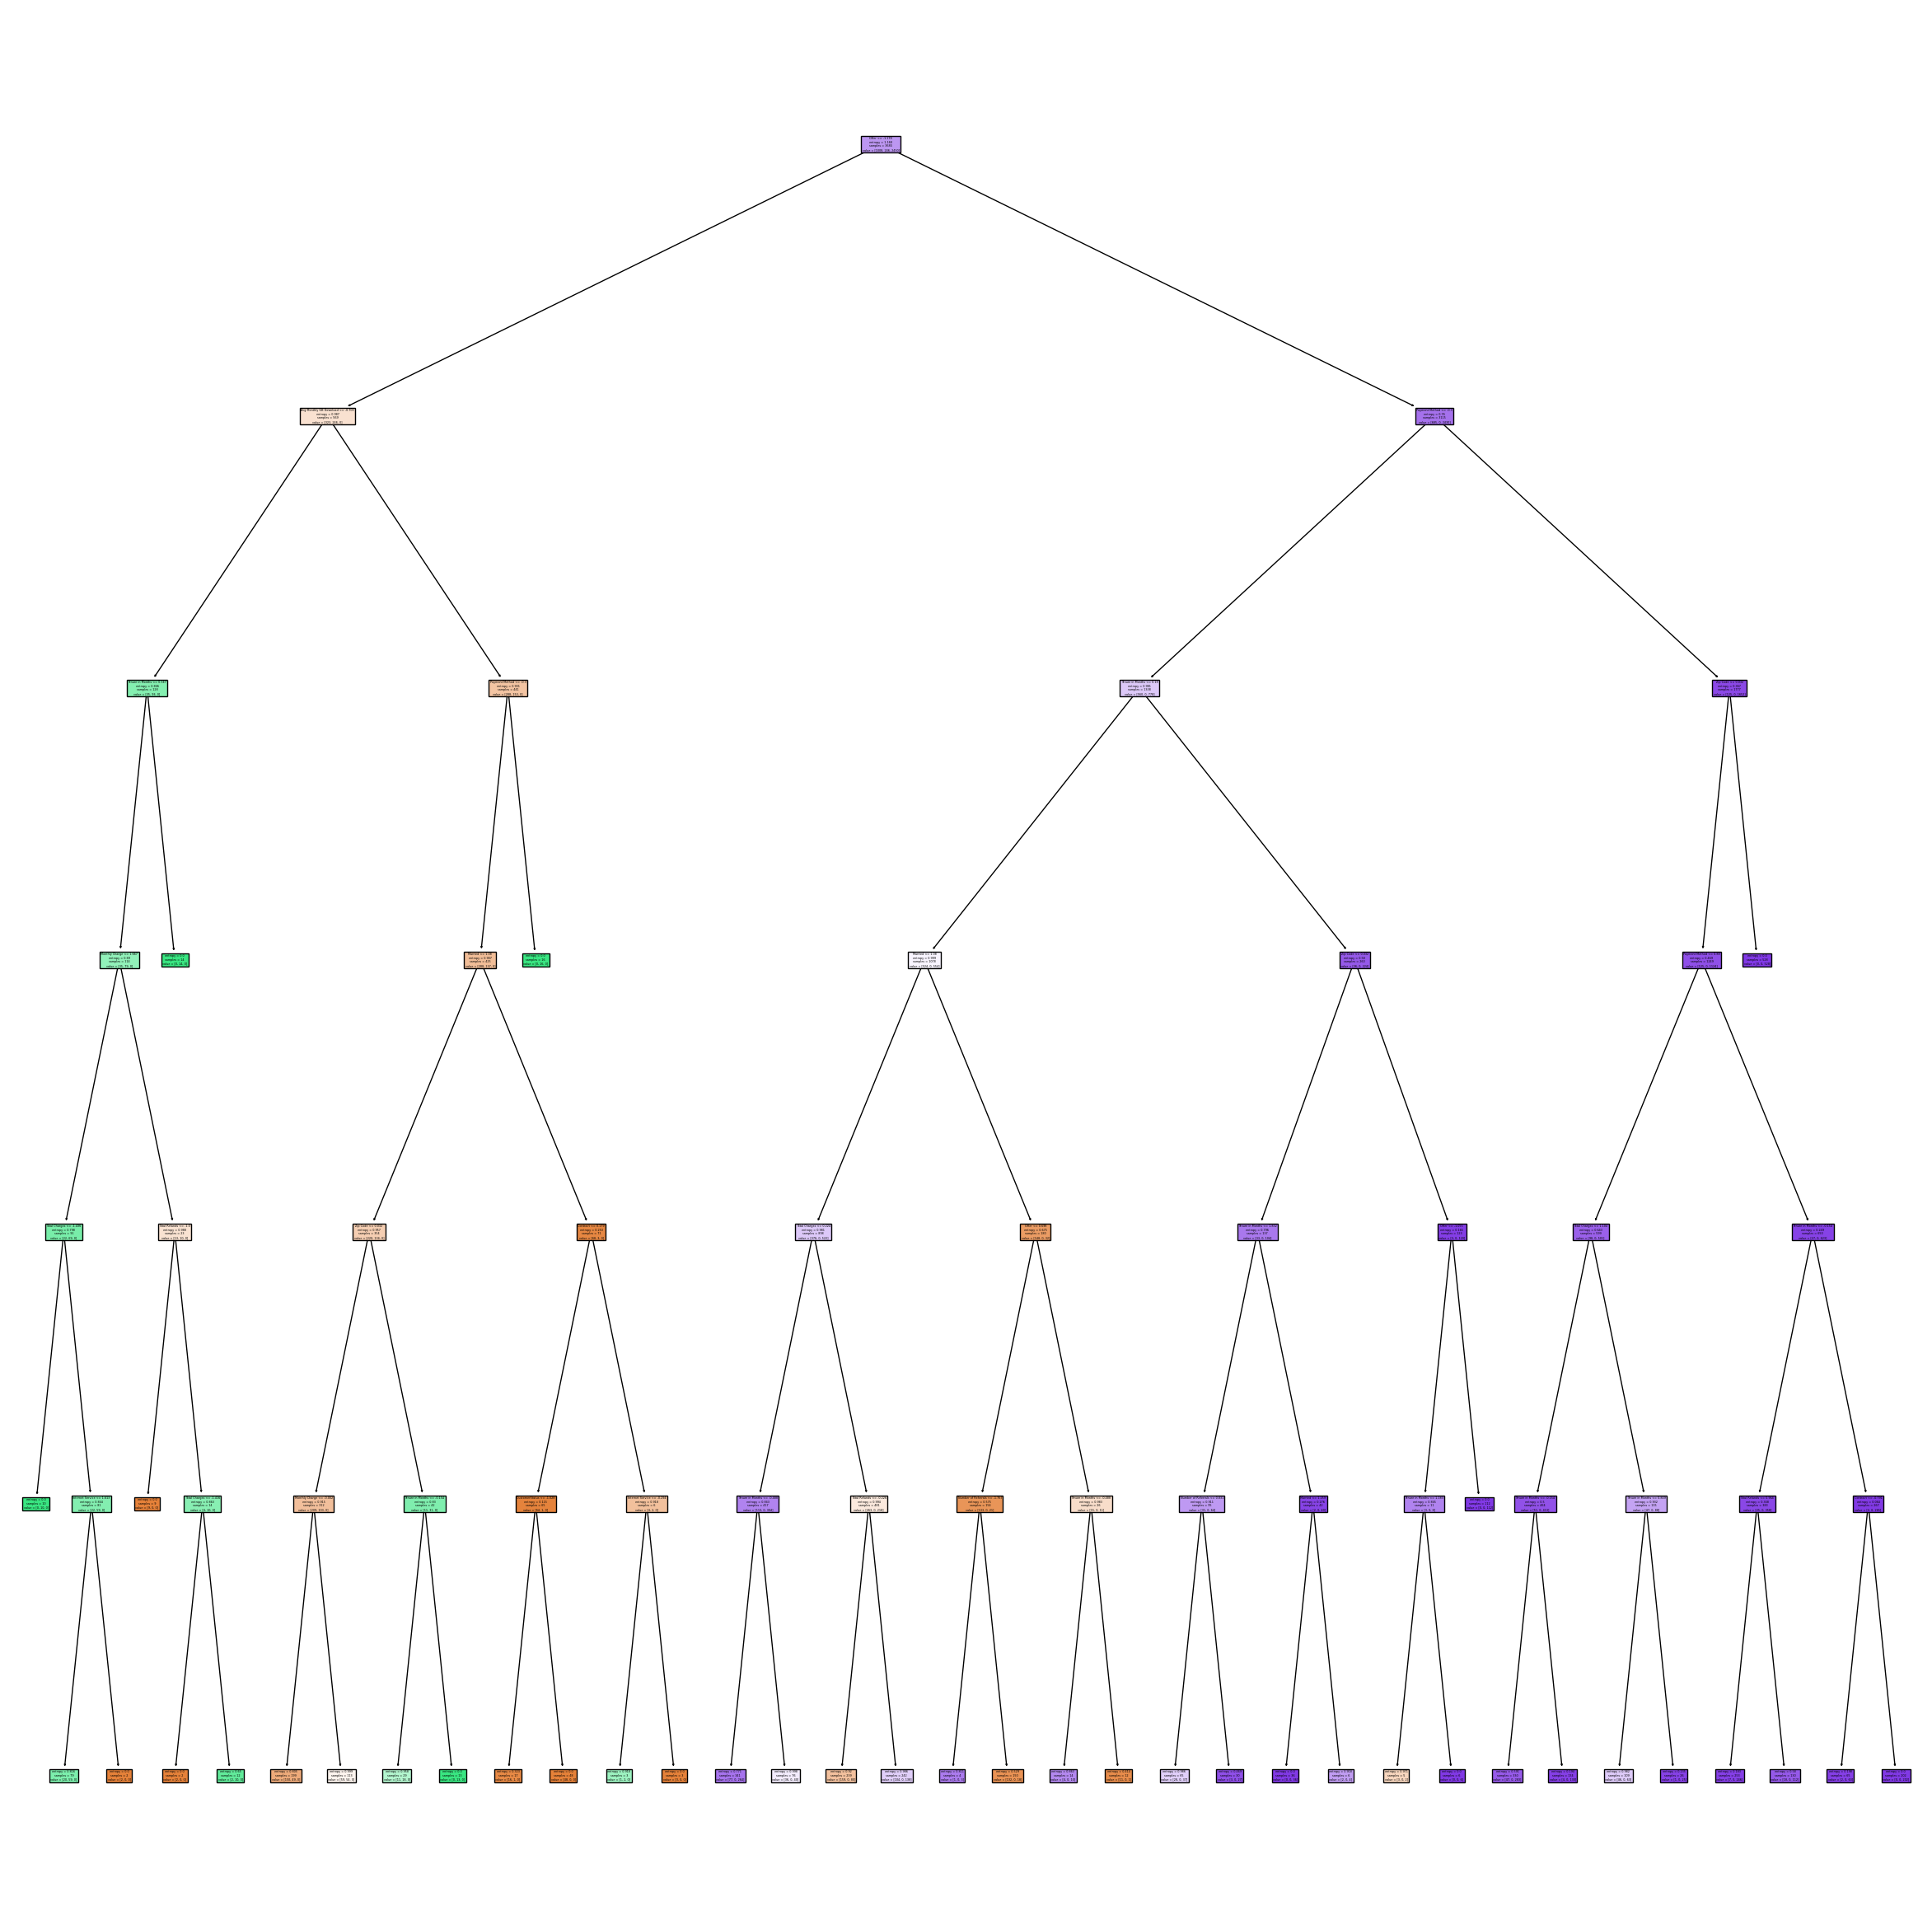

In [58]:
fig = plt.figure(figsize=(30,30))
_ = tree.plot_tree(dtree, 
                   feature_names=features,
                   filled=True)